# RANDOM FOREST ALGORITHM

<font color='grey'>__Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.__

<font color='grey'>__As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.__</font>

<font color='grey'>__The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.__</font>

_DATASET - Back.csv from the Kaggle<br>
Libraries - Pandas, Seaborn, and MatplotLib<br>
Algorithm - from sklearn.ensemble import RandomForestRegressor_

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
bank = pd.read_csv('bankk.csv')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
bank.shape

(11162, 17)

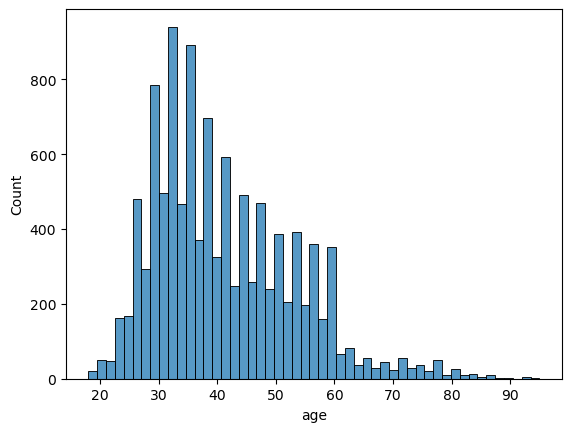

In [7]:
sns.histplot(bank['age'])
plt.show()

In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
bank['job'].value_counts(), bank.shape

(management       2566
 blue-collar      1944
 technician       1823
 admin.           1334
 services          923
 retired           778
 self-employed     405
 student           360
 unemployed        357
 entrepreneur      328
 housemaid         274
 unknown            70
 Name: job, dtype: int64,
 (11162, 17))

In [11]:
bank['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [13]:
plt.bar(x='job', data=bank)

TypeError: Horizontal orientation requires numeric `x` variable.

In [14]:
bank['job'].value_counts().keys()

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'unknown'],
      dtype='object')

In [19]:
bank['job'].value_counts().values

array([2566, 1944, 1823, 1334,  923,  778,  405,  360,  357,  328,  274,
         70], dtype=int64)

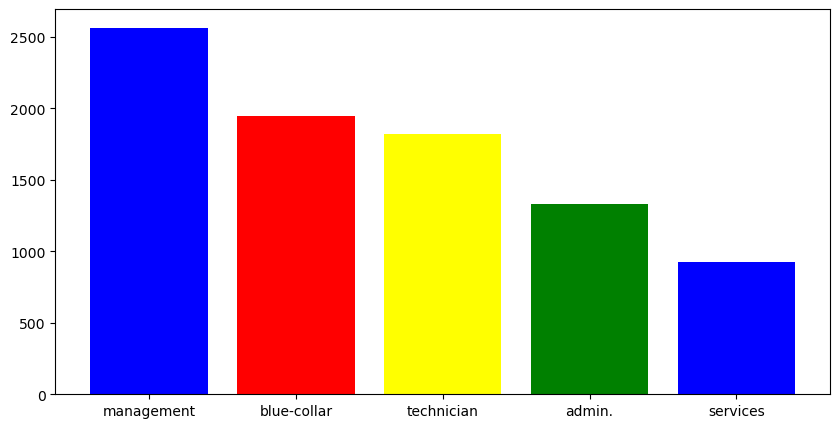

In [28]:
plt.figure(figsize=(10,5))
plt.bar(list(bank['job'].value_counts().keys()[0:5]), list(bank['job'].value_counts()[0:5]),color=["blue","red","yellow","green"])
plt.show()

In [29]:
bank['marital'].value_counts().keys()

Index(['married', 'single', 'divorced'], dtype='object')

In [30]:
bank['marital'].value_counts().values

array([6351, 3518, 1293], dtype=int64)

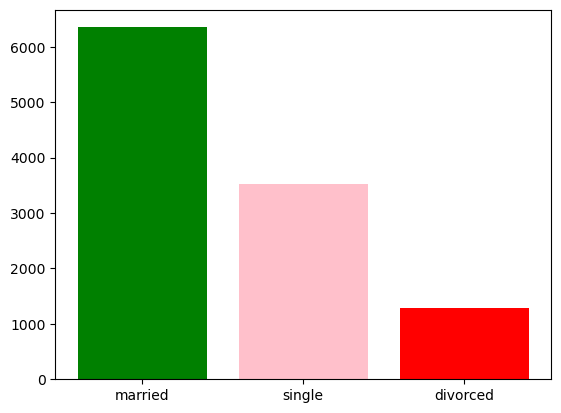

In [32]:
plt.bar(list(bank['marital'].value_counts().keys()),list(bank['marital'].value_counts()),color=["green","pink","red"])
plt.show()

In [33]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [34]:
bank['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

<BarContainer object of 4 artists>

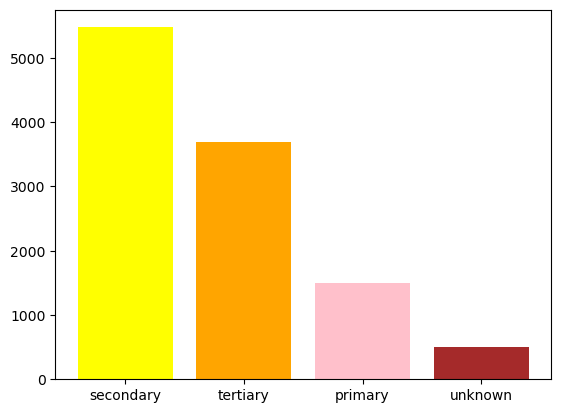

In [36]:
plt.bar(list(bank['education'].value_counts().keys()), list(bank['education'].value_counts()),color=["yellow","orange","pink","brown"])

In [37]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


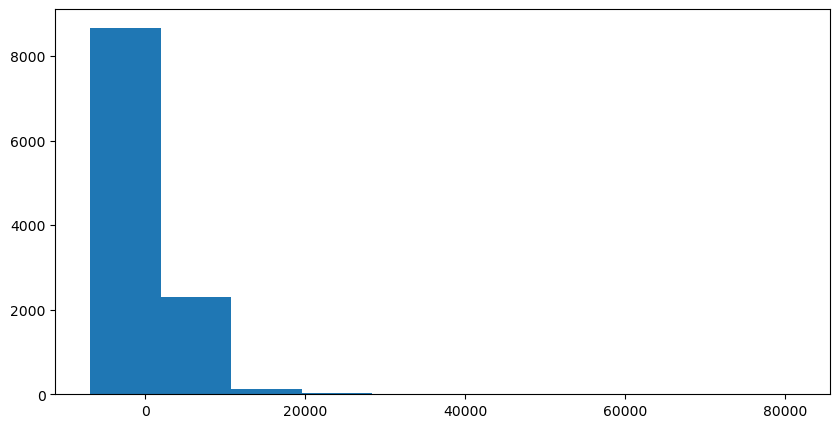

In [41]:
plt.figure(figsize=(10,5))
plt.hist(bank['balance'])
plt.show()

In [42]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [44]:
bank['loan'].value_counts(), bank.shape

(no     9702
 yes    1460
 Name: loan, dtype: int64,
 (11162, 17))

<BarContainer object of 2 artists>

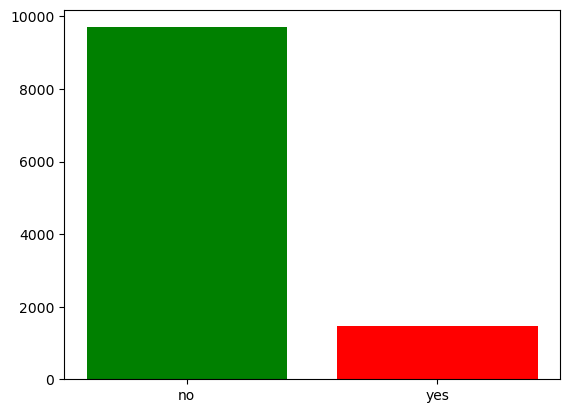

In [48]:
plt.bar(list(bank['loan'].value_counts().keys()), list(bank['loan'].value_counts()),color=["green","red"])

In [49]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [51]:
#age is independent variable and dependent variable is balance
x = bank[['age']]
y = bank[['balance']]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfg = RandomForestRegressor()

In [56]:
rfg.fit(x_train,y_train)

C:\Users\mohdo\AppData\Local\Temp\ipykernel_14028\2097697493.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfg.fit(x_train,y_train)


RandomForestRegressor()

In [57]:
y_pred = rfg.predict(x_test)

In [58]:
y_test.head(), y_pred[0:5]

(      balance
 1695     1052
 6155      282
 1151     1331
 2591      380
 945       275,
 array([1675.96053901, 1885.0286111 , 1469.04306854, 2292.19286651,
        1477.98935755]))

In [59]:
from sklearn.metrics import mean_squared_error

In [62]:
mean_squared_error(y_test,y_pred)

7790358.482279027